# Exploratory Data Analysis



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import pylab

In [2]:
df=pd.read_csv('House Price prediction.csv')

df.drop('Id',axis=1,inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4]:
# here we have total 80 independent features and one dependent feature output

In [5]:
df.shape

(1460, 80)

In [6]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

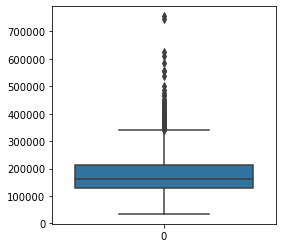

In [7]:
SalePrice=df['SalePrice']
plt.figure(figsize=(4,4))
sns.boxplot(data=SalePrice)

C:\Users\CHINTAN BHAVSAR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

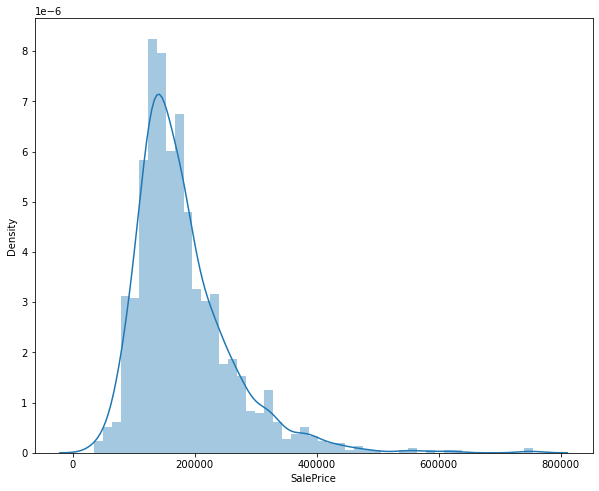

In [8]:
plt.figure(figsize=(10,8))
sns.distplot(SalePrice)

Observation:
1) from above distribution plot we can observe that majorly house price lies between 150000 and 300000 saleprice

In [9]:
# filter columns based on datatype 


In [10]:
 df.select_dtypes(include=['int64','float64']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
# find out missing values and handle it

In [13]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [14]:
null_percent=df.isnull().sum()/df.shape[0]*100
null_percent

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [15]:
col_for_drop=null_percent[null_percent>20].keys()
col_for_drop

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [16]:
df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],axis=1,inplace=True)
df.shape

(1460, 75)

In [17]:
#find unique value count


In [18]:
for i in df.columns:
    print(i+'\t'+str(len(df[i].unique())))

MSSubClass	15
MSZoning	5
LotFrontage	111
LotArea	1073
Street	2
LotShape	4
LandContour	4
Utilities	2
LotConfig	5
LandSlope	3
Neighborhood	25
Condition1	9
Condition2	8
BldgType	5
HouseStyle	8
OverallQual	10
OverallCond	9
YearBuilt	112
YearRemodAdd	61
RoofStyle	6
RoofMatl	8
Exterior1st	15
Exterior2nd	16
MasVnrType	5
MasVnrArea	328
ExterQual	4
ExterCond	5
Foundation	6
BsmtQual	5
BsmtCond	5
BsmtExposure	5
BsmtFinType1	7
BsmtFinSF1	637
BsmtFinType2	7
BsmtFinSF2	144
BsmtUnfSF	780
TotalBsmtSF	721
Heating	6
HeatingQC	5
CentralAir	2
Electrical	6
1stFlrSF	753
2ndFlrSF	417
LowQualFinSF	24
GrLivArea	861
BsmtFullBath	4
BsmtHalfBath	3
FullBath	4
HalfBath	3
BedroomAbvGr	8
KitchenAbvGr	4
KitchenQual	4
TotRmsAbvGrd	12
Functional	7
Fireplaces	4
GarageType	7
GarageYrBlt	98
GarageFinish	4
GarageCars	5
GarageArea	441
GarageQual	6
GarageCond	6
PavedDrive	3
WoodDeckSF	274
OpenPorchSF	202
EnclosedPorch	120
3SsnPorch	20
ScreenPorch	76
PoolArea	8
MiscVal	21
MoSold	12
YrSold	5
SaleType	9
SaleCondition	6
SalePrice

In [19]:
# here we have plethora of features so those features having high influence on sales price will take into consideration

In [20]:
corr=df.corr()

<AxesSubplot:>

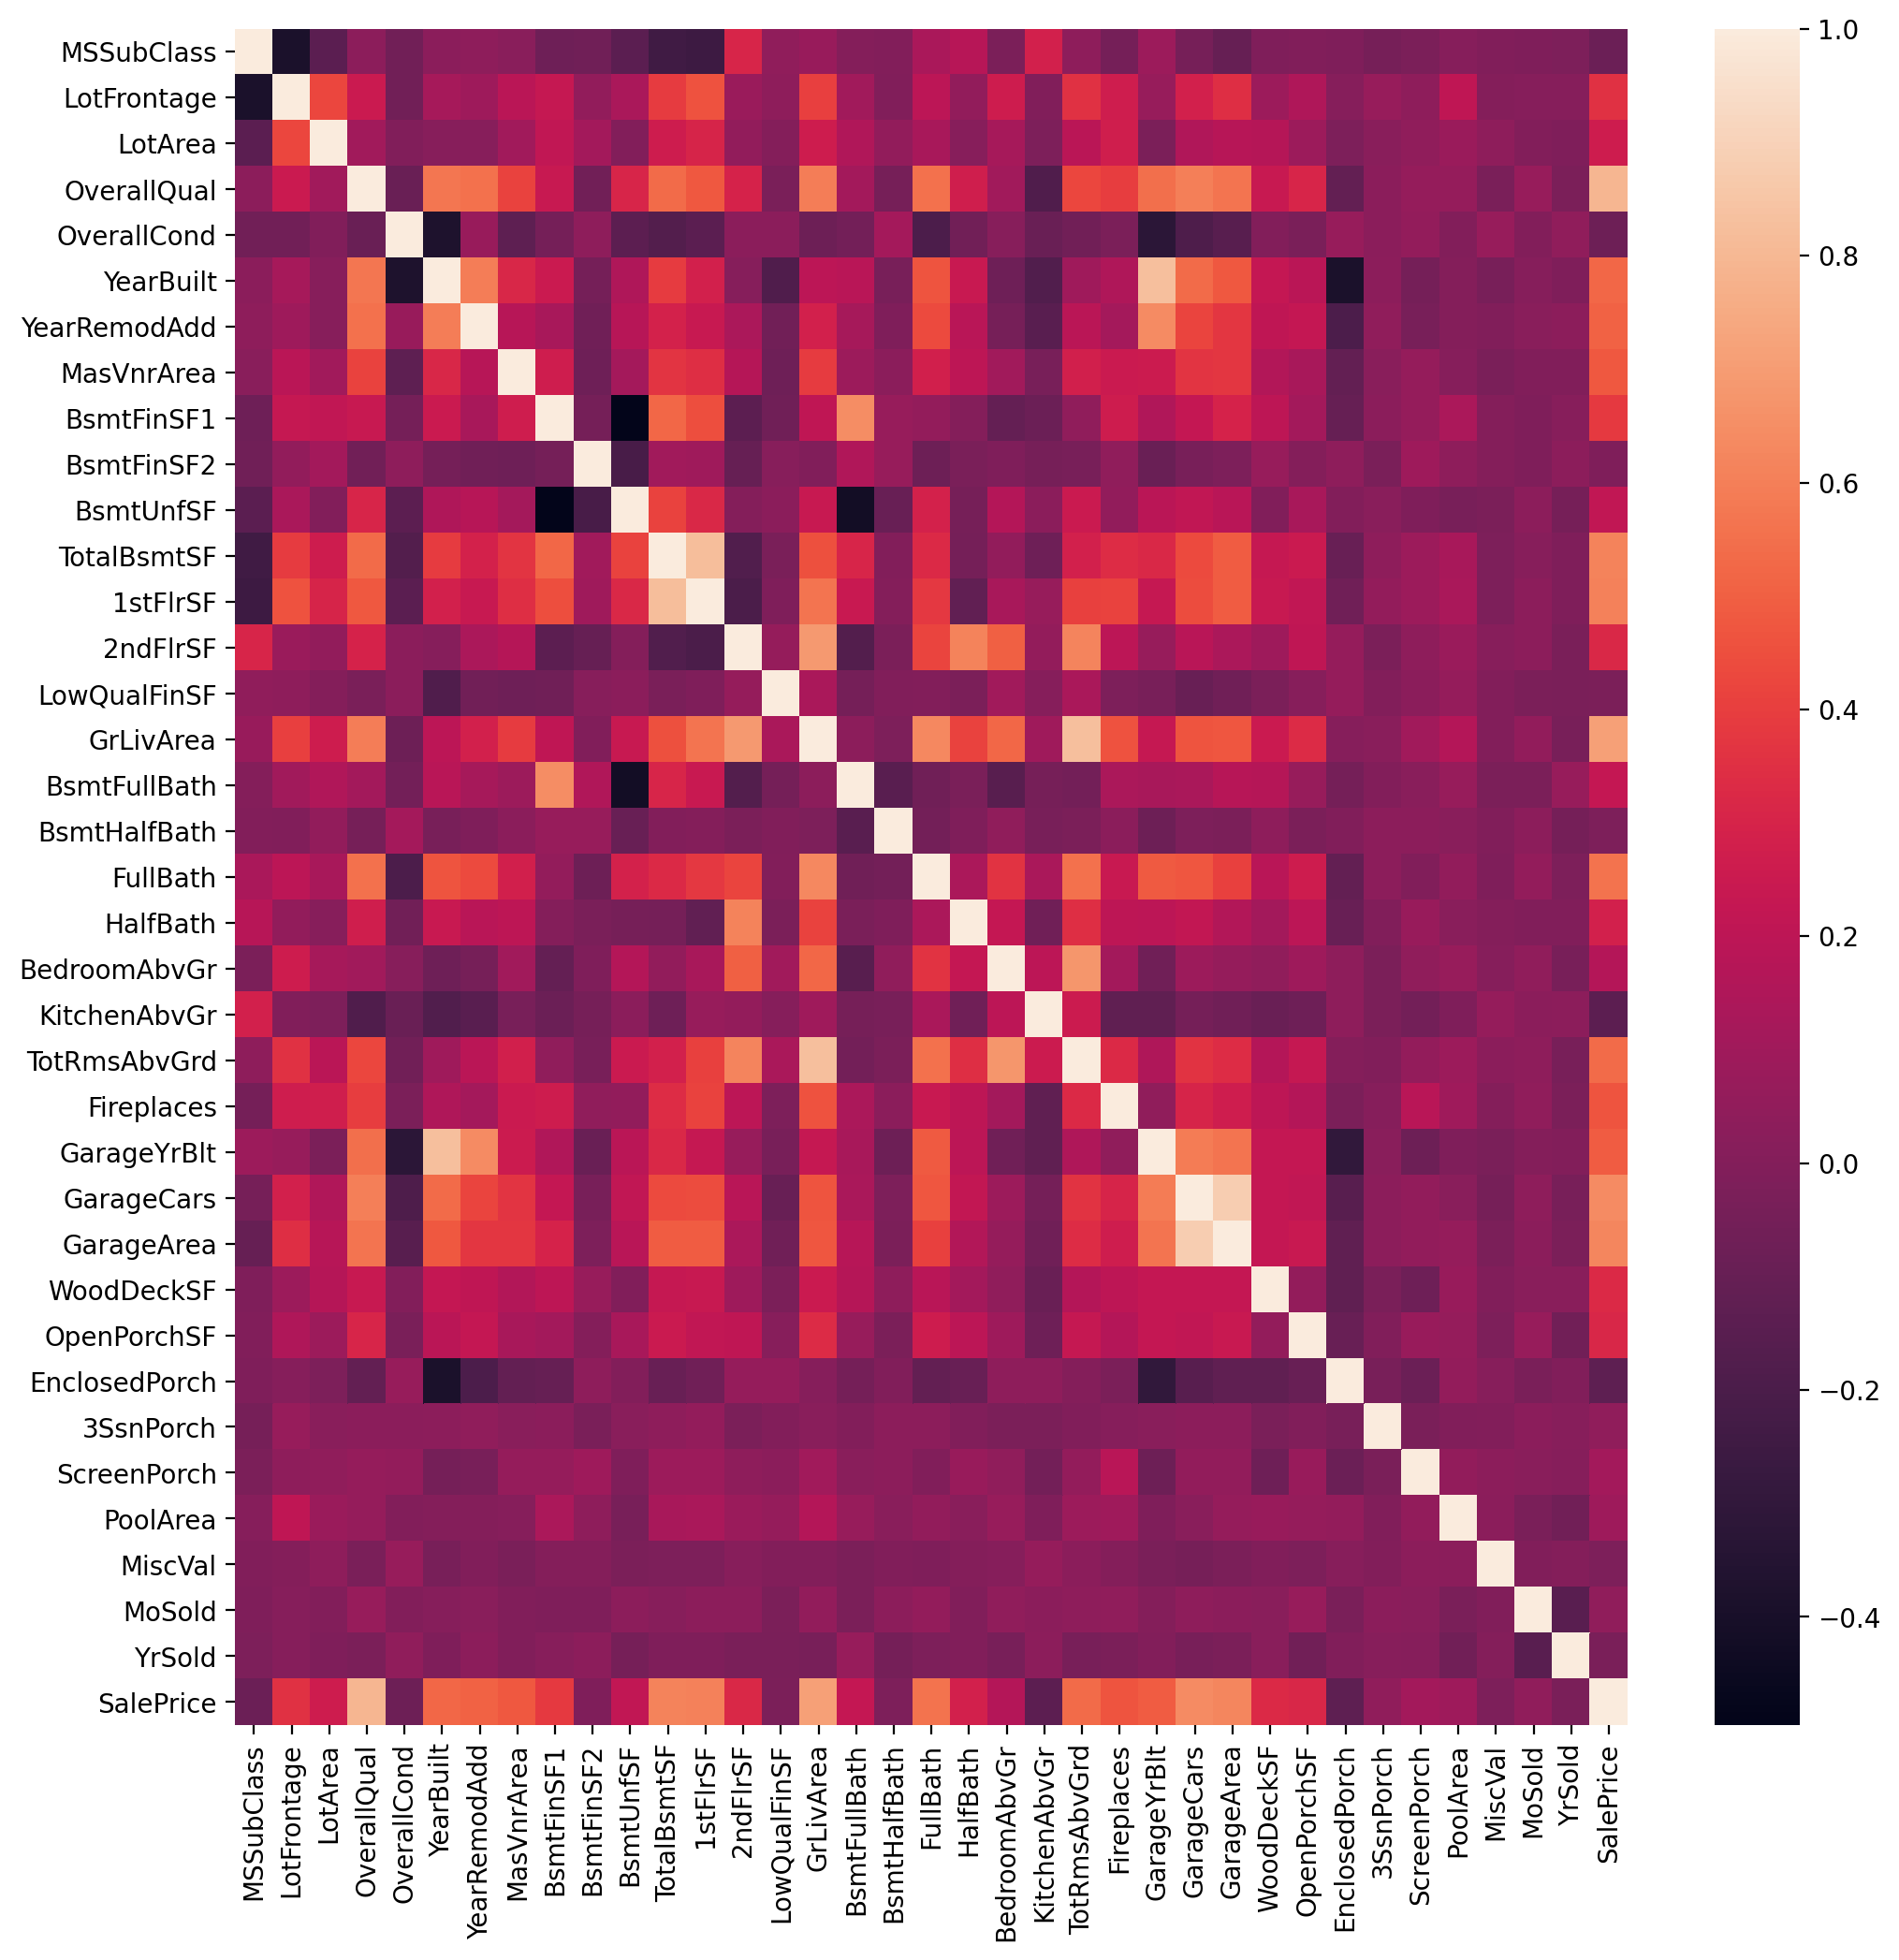

In [21]:
plt.figure(figsize=(12,12),dpi=200)
sns.heatmap(corr)

We will find relationship of highly correlated data with saleprice

In [22]:
# highly correlation index of this df

In [23]:
high_corr=corr.index[abs(corr['SalePrice'])>=0.5]
high_corr

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [24]:
# Bivariate graphic representation comparison with saleprice of highly correlated data

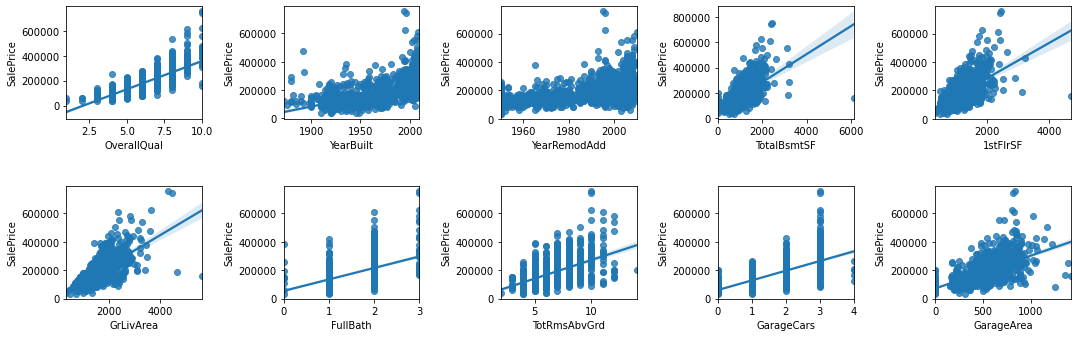

In [25]:
plt.figure(figsize=(18,12))
for i in range(len(high_corr)):
    if i <=9:
        plt.subplot(4,5,i+1)    
        plt.subplots_adjust(hspace=0.6,wspace=0.6)
        sns.regplot(data=df,x=high_corr[i],y='SalePrice')

Observations

1) Overall quality is completely correlated with saleprice, with increasing of quality saleprice rising very sharply\
2) From YearBuilt, as house becomes more old its sale price having less amount along with less saling quantity\
3) Major Houses which having selling price ranging from 50000 to 450000 having basement area of 0-2000 sqft\
4) First floor sqft having same impact on sale price as total basement sqft\
5) Ground living area upto 3000 sqft, plethora no of houses sold so grlive area has vital effect\
6) As no. of bathroom & living rooms increasing saleprice is also increasing\
7) Houses which have 2-3 garage cars parkin they are sold in steeper way


## Handling NaN values and handling outliers

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

C:\Users\CHINTAN BHAVSAR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

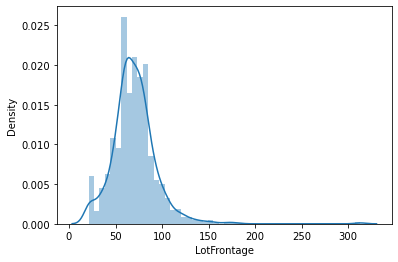

In [27]:
LotFrontage=df['LotFrontage']
sns.distplot(LotFrontage)

In [28]:
df['LotFrontage'].fillna(np.mean(df['LotFrontage']), inplace=True)

In [29]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [30]:
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [31]:
df['MasVnrType']=np.where(df['MasVnrType'].isnull(),0,1)

In [32]:
df['MasVnrArea'].fillna(np.mean(df['MasVnrArea']), inplace=True)

In [33]:
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True)
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace=True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace=True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace=True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)
df['GarageType'].fillna(df['GarageType'].mode()[0], inplace=True)
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0], inplace=True)
df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace=True)
df['GarageQual'].fillna(df['GarageQual'].mode()[0], inplace=True)
df['GarageYrBlt'].fillna(0,inplace=True)

In [34]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [35]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [36]:
one_hot=df.select_dtypes(include=['object']).columns
one_hot

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

## OneHot encoding

In [37]:
df1=pd.get_dummies(df,columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'])
df1

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,1,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,1,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,1,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,1,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,1,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,1,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,1,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,1,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [38]:
X=df1.drop('SalePrice',axis=1)
y=df['SalePrice']

## Train_Test splitting of dataframe with robust sacling so that we can avoid effect of outliers

In [39]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
scaler=RobustScaler()

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [41]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

## Cross_Validation

In [42]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score,make_scorer

In [43]:
def test_model(model,X_train=scaled_X_train,y_train=y_train):
    cv=KFold(n_splits=4, shuffle=True, random_state=45)
    r2=make_scorer(r2_score)
    r2_val_score=cross_val_score(model,X_train,y_train,cv=cv,scoring=r2)
    score=r2_val_score.mean()
    return score


## Using different regression ML models 

1) Linear Regression Model

In [44]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
test_model(LR)

-413700361106.95135

 2) L2, Ridge Regression

In [45]:
from sklearn.linear_model import Ridge
rdg=Ridge()
test_model(rdg)

0.8560515549585247

3) L1, Lasso Regression

In [46]:
from sklearn.linear_model import Lasso
laso=Lasso()
test_model(laso)

C:\Users\CHINTAN BHAVSAR\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127695409404.41655, tolerance: 485472824.7940147
  model = cd_fast.enet_coordinate_descent(
C:\Users\CHINTAN BHAVSAR\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160129505848.01587, tolerance: 568194982.3596183
  model = cd_fast.enet_coordinate_descent(
C:\Users\CHINTAN BHAVSAR\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149107579286.5415, tolerance: 541034795.0519686
  model = cd_fast.enet_coordinate_descent(
C:\Users\CHINTAN BHAVSAR\anaconda3\lib\site-packages\sklearn\linear_model\_co

0.8292919523816656

4) Support Vector Regression

In [47]:
from sklearn.svm import SVR
model1=SVR()
test_model(model1)

-0.05010321531006179

from above we can observe that accuracy of this model poor so that we are using Hyper parameter tuning

param_grid = {'C': [0.001, 0.05,0.01, 0.1, 0.5, 1], 
              'kernel': ['linear', 'rbf', 'poly'], 
              'gamma':['scale', 'auto'],
             'degree':[2,3,4,5],
             'epsilon': [0,0.01,0.1,0.5,1,2]}

from sklearn.model_selection import GridSearchCV
svr=SVR()
grid=GridSearchCV(svr, param_grid)
grid.fit(scaled_X_train,y_train)
grid.best_params_
                 

5) Decision Tree Regressor

In [49]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
test_model(tree)

0.7039424987067594

6) Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
rdm=RandomForestRegressor(n_estimators=1000,random_state=45)
test_model(rdm)

0.8431513056140616

7) Bagging & Boosting Regressors

In [52]:
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,
bag=BaggingRegressor(n_estimators=1000,random_state=45)
test_model(bag)

0.8438821677059243

In [53]:
gbst=GradientBoostingRegressor()
test_model(gbst)

0.8609445954684527

In [57]:
import xgboost as xgb
model_2=xgb.XGBRegressor()
test_model(model_2)

0.8327658153012255

# Here, we conclude that Gradient boosting regressor is best ML model for our project